100%|██████████| 100000/100000 [00:09<00:00, 10276.24it/s]


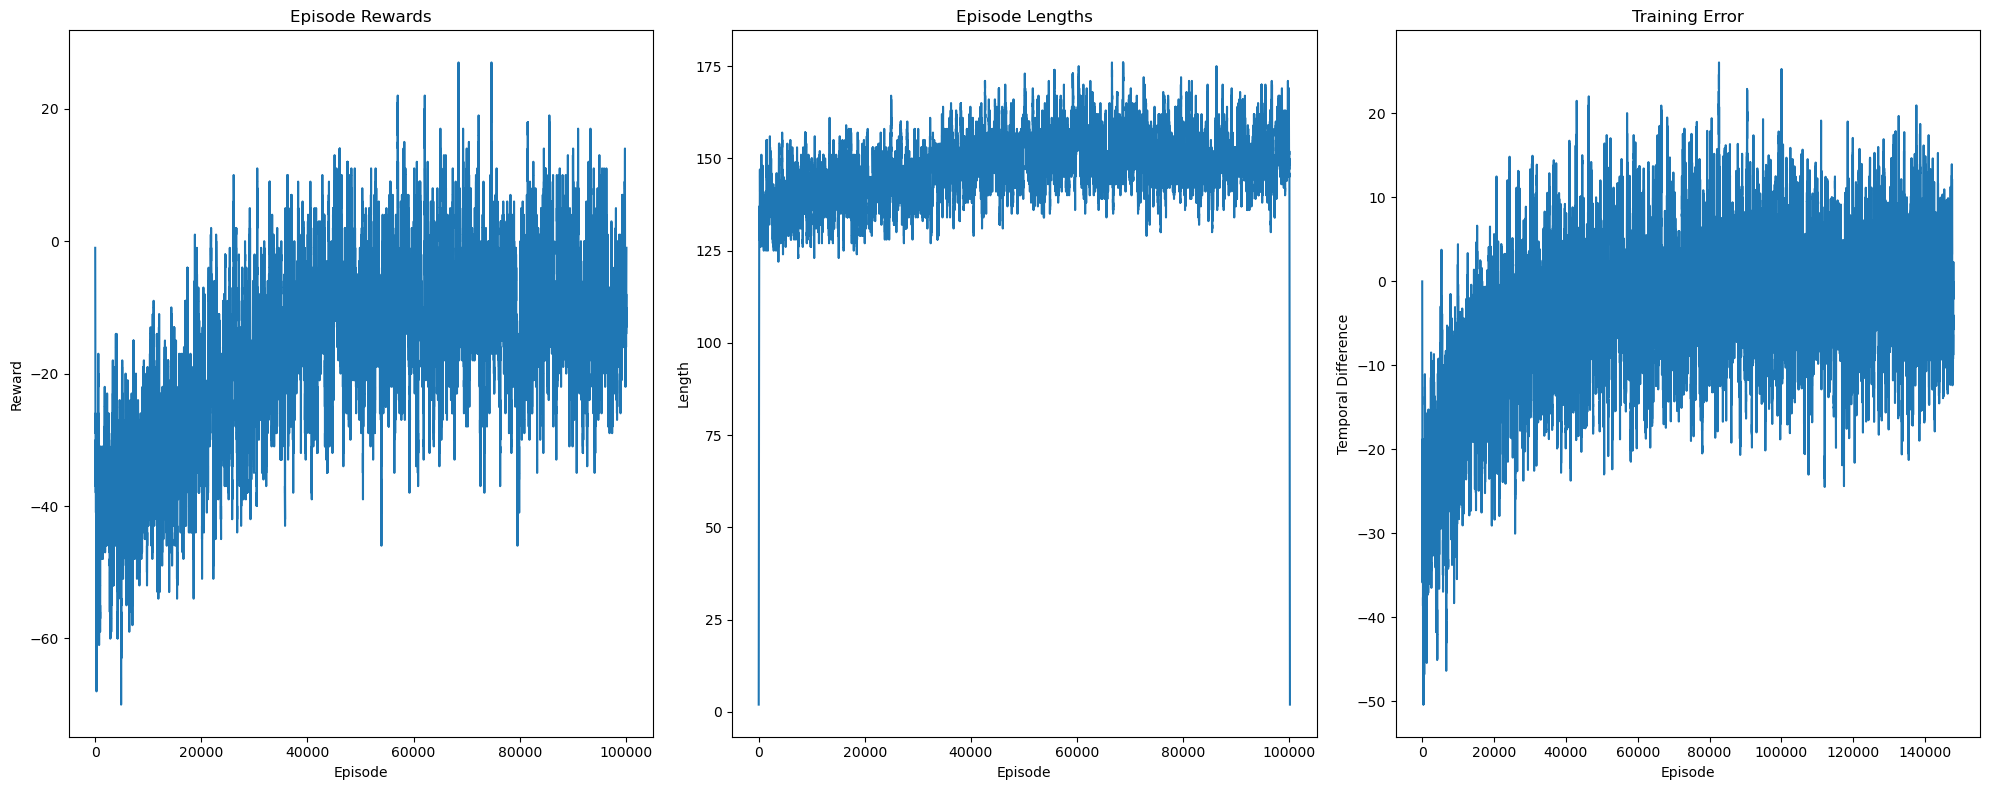

In [8]:
import agent as ag
from tqdm import tqdm
from matplotlib import pyplot as plt

learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)
final_epsilon = 0.1

env = ag.gym.make("Blackjack-v1", sab=False)
env = ag.gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)

agent = ag.BlackjackAgent(env=env, learning_rate=learning_rate,
                            initial_epsilon=start_epsilon, epsilon_decay=epsilon_decay,
                              final_epsilon=final_epsilon,)

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(obs, action, reward, terminated, next_obs)

        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()    

fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].plot(ag.np.convolve(env.return_queue, ag.np.ones(100)))
axs[0].set_title("Episode Rewards")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Reward")

axs[1].plot(ag.np.convolve(env.length_queue, ag.np.ones(100)))
axs[1].set_title("Episode Lengths")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Length")

axs[2].plot(ag.np.convolve(agent.training_error, ag.np.ones(100)))
axs[2].set_title("Training Error")
axs[2].set_xlabel("Episode")
axs[2].set_ylabel("Temporal Difference")

plt.tight_layout()
plt.show()    